$\textit{Computational Finance - 0}$
### The daily log returns are not normally distributed ! 
The normal distribution under-estimates very large daily log returns. 
Let's verify that on META historical daily log returns.

In [18]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
GetFacebookInformation = yf.Ticker("META")
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y,
# 2y, 5y, 10y and ytd.
METAdf = GetFacebookInformation.history(period="10y")
METAdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-18 00:00:00-04:00,76.539547,77.097871,76.290297,76.768860,23031000,0.0,0.0
2014-09-19 00:00:00-04:00,77.167661,78.064961,76.210544,77.676132,76671000,0.0,0.0
2014-09-22 00:00:00-04:00,76.768862,77.297270,75.722011,76.569466,31961000,0.0,0.0
2014-09-23 00:00:00-04:00,76.100870,78.393961,75.811739,78.054985,36814000,0.0,0.0
2014-09-24 00:00:00-04:00,77.865556,78.383999,77.277330,78.304237,30680000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-11 00:00:00-04:00,506.526780,512.630942,495.127651,511.342163,10782500,0.0,0.0
2024-09-12 00:00:00-04:00,516.557221,526.208049,514.728948,525.099060,11993300,0.0,0.0
2024-09-13 00:00:00-04:00,519.844106,527.077196,516.617143,524.119995,10321400,0.0,0.0


In [31]:
# Daily log(Close) :
METAdf["log(St)"] = np.log(METAdf.Close)
# Daily log(Open) :
METAdf["log(S0)"] = np.log(METAdf.Open)
# Daily log returns :
METAdf["LogReturns"] = METAdf["log(St)"] - METAdf["log(S0)"]
METAdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log(St),log(S0),LogReturns
Date,,,,,,,,,,
2014-09-18 00:00:00-04:00,76.539547,77.097871,76.290297,76.768860,23031000,0.0,0.0,4.340799,4.337808,0.002992
2014-09-19 00:00:00-04:00,77.167661,78.064961,76.210544,77.676132,76671000,0.0,0.0,4.352548,4.345980,0.006568
2014-09-22 00:00:00-04:00,76.768862,77.297270,75.722011,76.569466,31961000,0.0,0.0,4.338198,4.340799,-0.002601
2014-09-23 00:00:00-04:00,76.100870,78.393961,75.811739,78.054985,36814000,0.0,0.0,4.357414,4.332060,0.025354
2014-09-24 00:00:00-04:00,77.865556,78.383999,77.277330,78.304237,30680000,0.0,0.0,4.360602,4.354984,0.005618
...,...,...,...,...,...,...,...,...,...,...
2024-09-11 00:00:00-04:00,506.526780,512.630942,495.127651,511.342163,10782500,0.0,0.0,6.237039,6.227577,0.009462
2024-09-12 00:00:00-04:00,516.557221,526.208049,514.728948,525.099060,11993300,0.0,0.0,6.263587,6.247186,0.016401
2024-09-13 00:00:00-04:00,519.844106,527.077196,516.617143,524.119995,10321400,0.0,0.0,6.261721,6.253529,0.008192


In [32]:
logreturns = METAdf.LogReturns.values
logreturns

array([ 0.00299153,  0.00656756, -0.00260074, ...,  0.00819169,
        0.01652502, -0.00238373])

In [33]:
mean = logreturns.mean()
std = logreturns.std()

In [34]:
x = np.linspace(-0.1, 0.1, 1000)
y = norm.pdf(x, mean, std)

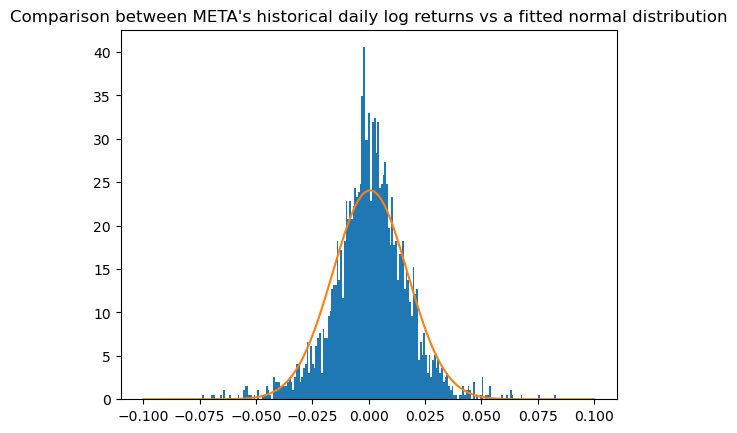

In [36]:
plt.title("Comparison between META's historical daily log returns vs a fitted normal distribution")
plt.hist(logreturns, bins=200, density=True)
plt.plot(x, y)
plt.show()